In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../../../../../Data/titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [16]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

# Using Sklearn

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

impute_trf = ColumnTransformer(transformers=[
    ('age',SimpleImputer(strategy='median'),['Age']),
    ('fare',SimpleImputer(),['Fare']),
],remainder='passthrough')

In [19]:
X_train_imp = impute_trf.fit_transform(X_train)
X_test_imp = impute_trf.transform(X_test)

In [20]:
np.isnan(X_train_imp).sum(axis=0)

array([0, 0, 0])

# Check Variance

In [27]:
imputed_data = pd.DataFrame([])
imputed_data["Age"] = df['Age']
imputed_data['Age Mean'] = df['Age'].fillna(df['Age'].mean())
imputed_data['Age Median'] = df['Age'].fillna(df['Age'].median())


imputed_data["Fare"] = df['Fare']
imputed_data['Fare Mean'] = df['Fare'].fillna(df['Fare'].mean())
imputed_data['Fare Median'] = df['Fare'].fillna(df['Fare'].median())

imputed_data

,Age,Age Mean,Age Median,Fare,Fare Mean,Fare Median
0,22.0,22.000000,22.0,7.2500,7.250000,7.2500
1,38.0,38.000000,38.0,71.2833,71.283300,71.2833
2,26.0,26.000000,26.0,7.9250,7.925000,7.9250
3,35.0,35.000000,35.0,53.1000,53.100000,53.1000
4,35.0,35.000000,35.0,8.0500,8.050000,8.0500
...,...,...,...,...,...,...
886,27.0,27.000000,27.0,13.0000,13.000000,13.0000
887,19.0,19.000000,19.0,30.0000,30.000000,30.0000
888,NaN,29.699118,28.0,23.4500,23.450000,23.4500
889,26.0,26.000000,26.0,NaN,32.279338,14.4542


In [30]:
variance_df = pd.DataFrame(
    {
        "Columns":["Age","Fare"],
        "Original Variance":[imputed_data['Age'].var(), imputed_data['Fare'].var()],
        "Mean Imp Variance":[imputed_data['Age Mean'].var(), imputed_data['Fare Mean'].var()],
        "Median Imp Variance":[imputed_data['Age Median'].var(), imputed_data['Fare Median'].var()]
    }
)
variance_df

,Columns,Original Variance,Mean Imp Variance,Median Imp Variance
0,Age,211.019125,169.052400,169.512498
1,Fare,2530.673077,2402.717697,2417.971600


# Check Distribution

<Axes: xlabel='Age', ylabel='Density'>

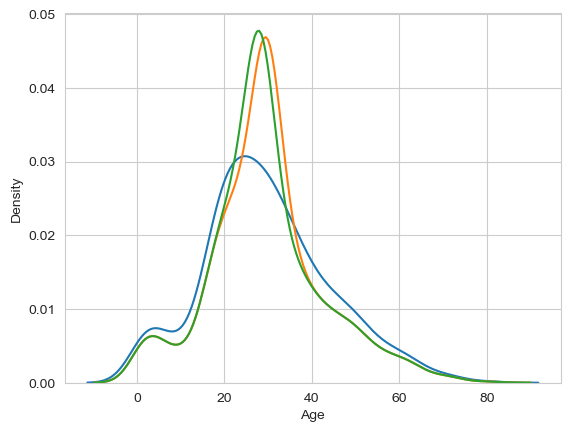

In [34]:
sns.kdeplot(data=imputed_data,x='Age')
sns.kdeplot(data=imputed_data,x='Age Mean')
sns.kdeplot(data=imputed_data,x='Age Median')

<Axes: xlabel='Fare', ylabel='Density'>

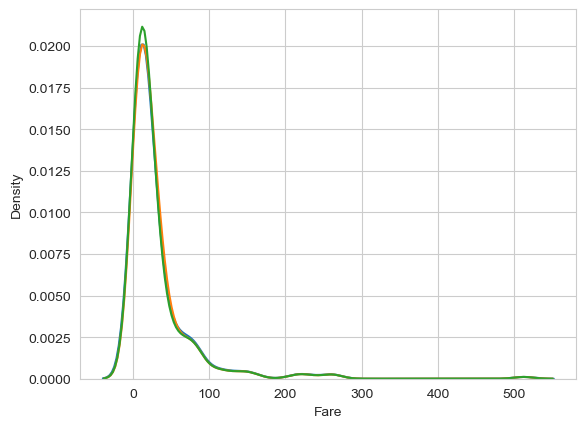

In [35]:
sns.kdeplot(data=imputed_data,x='Fare')
sns.kdeplot(data=imputed_data,x='Fare Mean')
sns.kdeplot(data=imputed_data,x='Fare Median')

# Check covariance

In [36]:
imputed_data.cov()

,Age,Age Mean,Age Median,Fare,Fare Mean,Fare Median
Age,211.019125,211.019125,211.019125,78.071438,73.727862,73.196997
Age Mean,211.019125,169.052400,169.052400,62.210610,59.065130,58.639842
Age Median,211.019125,169.052400,169.512498,65.546143,62.232012,61.706696
Fare,78.071438,62.210610,65.546143,2530.673077,2530.673077,2530.673077
Fare Mean,73.727862,59.065130,62.232012,2530.673077,2402.717697,2402.717697
Fare Median,73.196997,58.639842,61.706696,2530.673077,2402.717697,2417.971600


In [37]:
imputed_data.corr()

,Age,Age Mean,Age Median,Fare,Fare Mean,Fare Median
Age,1.000000,1.000000,1.000000,0.099481,0.097273,0.096203
Age Mean,1.000000,1.000000,0.998642,0.094681,0.092676,0.091718
Age Median,1.000000,0.998642,1.000000,0.099626,0.097513,0.096384
Fare,0.099481,0.094681,0.099626,1.000000,1.000000,1.000000
Fare Mean,0.097273,0.092676,0.097513,1.000000,1.000000,0.996841
Fare Median,0.096203,0.091718,0.096384,1.000000,0.996841,1.000000


# Boxplot

<Axes: >

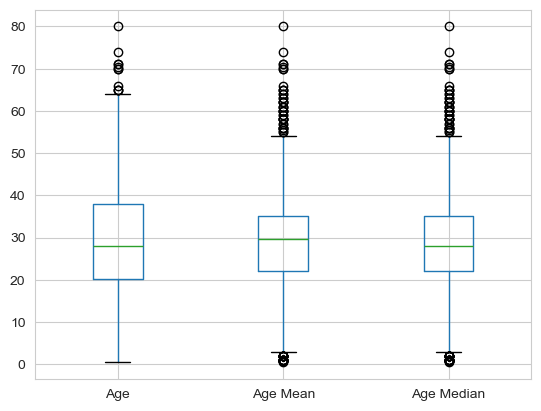

In [39]:
imputed_data.iloc[:,:3].boxplot()

<Axes: >

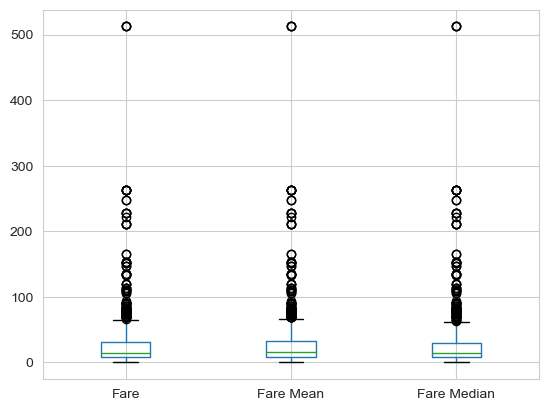

In [40]:
imputed_data.iloc[:,3:].boxplot()